Note : To know about this project refer [Classifying Iris Species.pdf](<Classifying Iris Species.pdf>)

### Importing Data Set

In [150]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

### Exploring Data set

The iris object that is returned by load_iris is a Bunch object, which is very similar to a dictionary. It contains keys and values.

In [151]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [152]:
print("Target names:",iris_dataset.target_names)
print("Feature names:",iris_dataset.feature_names)

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [153]:
iris_dataset.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [154]:
print(iris_dataset['DESCR'][:2000]+ "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [155]:
print("Shape of data: ",iris_dataset['data'].shape)

Shape of data:  (150, 4)


In [156]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

 From this data, we can see that all of the first five flowers. In first column 
 - sepal length - 5.1
 - sepal width -3.5
 - petal length -1.4
 - petal width -0.2

In [157]:
iris_dataset['target'].shape

(150,)

In [158]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The meanings of the numbers are given by the iris['target_names'] array: 0 means setosa, 1 means versicolor, and 2 means virginica.

###  Measuring Success: Training and Testing Data

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],train_size=0.7,random_state=0)

In [160]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)

Shape of X_train (105, 4)
Shape of y_train (105,)


In [161]:
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_test (45, 4)
Shape of y_test (45,)


### Look at Your Data

In [162]:
%matplotlib inline
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt

In [163]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe['species'] = y_train  # Add the target variable to the DataFrame


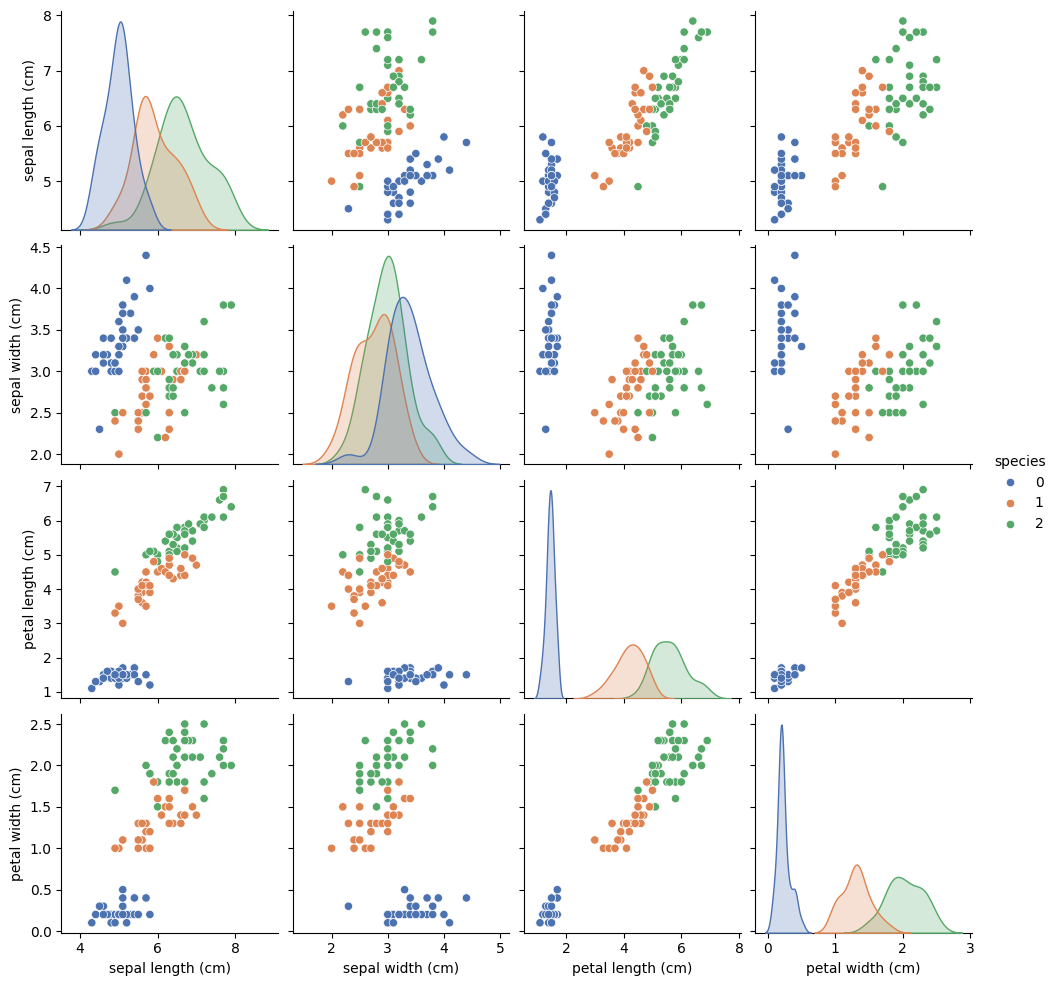

In [164]:
# create a scatter matrix from the dataframe, color by y_train
# Use seaborn's pairplot to replicate scatter matrix with customizations
sns.pairplot(iris_dataframe, hue='species', palette='deep', markers='o');

### Building Models

The most important parameter of KNeighbor sClassifier is the number of neighbors, which we will set to 1

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=2)

In [166]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

### Making Predictions

In [167]:
prediction = knn.predict([[5, 2.9, 1, 0.2]])
prediction

array([0])

In [168]:
iris_dataset.target_names[prediction]

array(['setosa'], dtype='<U10')

### Evaluating the Model

In [169]:
y_pred = knn.predict(X_test)

In [170]:
import numpy as np
np.mean(y_pred == y_test)

0.9777777777777777

In [171]:
knn.score(X_test, y_test)

0.9777777777777777

In [172]:
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


In [173]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [174]:
print(metrics.confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
